In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# 导入提供的数据
midwest = pd.read_csv("data/midwest_filter.csv")

In [3]:
# 设置各种属性
large = 22
med = 16
small = 12

params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

In [4]:
# 准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]


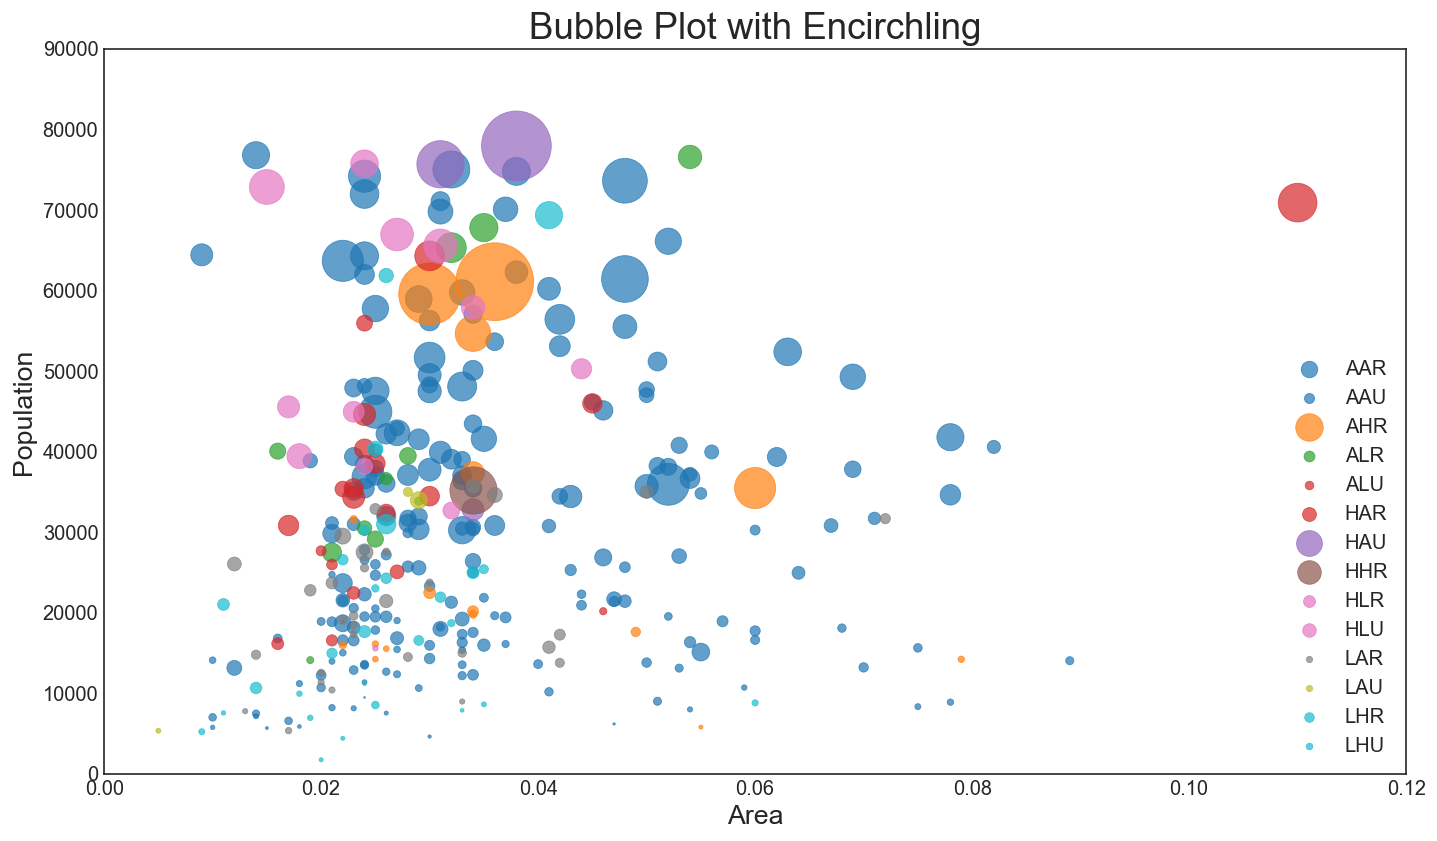

In [13]:
# 设置画布
fig = plt.figure(
    figsize=(14,8)
    ,dpi=120
    ,facecolor='w'
    ,edgecolor='k'
)

# 气泡图只需要改变S参数的大小即可，一般可将其与其他值联系
for i,category in enumerate(categories):
    plt.scatter(
        'area'
        ,'poptotal'
        ,data = midwest.loc[midwest.category == category, :] 
        ,s = 'popasian'   # 亚洲人口数量作为气泡图大小
        # ,s = midwest.loc[midwest.category == category, 'percasian']* 500    # 亚洲人口比例作为气泡图大小，并做调整
        ,c = np.array(colors[i]).reshape(1,-1)
        ,label = str(category)
        # ,edgecolors='k' # 在这里是点的边框颜色，不设置默认与c相同
        ,alpha=0.7  # 透明度防遮挡
        ,linewidths=0.5 #点外圈线条的宽度
    )

# 其他方面的装饰
plt.gca().set(
    xlim = (0.0,0.12)
    ,ylim=(0,90000)
    ,xlabel = 'Area'
    ,ylabel = 'Population'
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encirchling", fontsize=22)
plt.legend(
    fontsize=12
    ,markerscale = 0.5  # 现有气泡图的比例
)
plt.show()